In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
comments = pd.read_csv('reddit-analyze.csv', error_bad_lines=False)

b'Skipping line 1012963: expected 10 fields, saw 14\n'


In [6]:
comments.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,1.012995e+06,1.012995e+06,1.012995e+06,1.012995e+06,1.012995e+06,1.012995e+06
mean,3.986793e-02,3.160612e-04,2.003576e-02,5.346210e-04,7.542059e-03,1.190072e-03
std,1.072835e-01,6.308678e-03,8.387686e-02,8.469448e-03,4.253948e-02,1.090382e-02
min,1.660900e-05,3.319528e-09,4.233935e-06,5.293491e-10,2.858158e-07,9.404494e-08
25%,1.294982e-03,3.834245e-07,1.392575e-04,3.623686e-07,3.654400e-05,7.940893e-06
50%,4.571431e-03,1.241124e-06,3.675151e-04,1.867519e-06,1.379369e-04,2.921317e-05
75%,2.076215e-02,5.870613e-06,1.485618e-03,1.397370e-05,7.989902e-04,1.543910e-04
max,9.999309e-01,7.427316e-01,9.959408e-01,8.651747e-01,9.840857e-01,8.710796e-01


In [7]:
list(comments.nlargest(12, 'toxic')['selftext'])

["Take a gander!<lb><lb><lb><lb><lb><lb><lb><lb><lb>YOU'RE A FUCKING FAGGOT<lb><lb>NO seriously, all you do is post about SFV on end writing paragraphs that nobody gives a legit fuck about <lb><lb>REMINDER: YOU USE RYU #NIGGA<lb><lb>Thats all you fucking use dude, how about instead of writing paragraphs about a shit fucking game YOU use a real character that takes skill like FANG. Oh wait-- you can't because you're a fucking idiot, idiots like you is what makes LTG and I cringe, you get 50% off one fucking combo because you're literally so fucking retarded to function like a normal human being. <lb><lb>As for you ALTS, you #niggas gay too. Making account about some shoryu-PUSSY that's never even been to a local but can write fucking ESSAY's for a shit game that should have never bene created. <lb><lb>I have SO MUCH more to say but unlike l2edford, I'm not a fucking loser who writes essay's on irrelevant shit. I'm going to Xanadu to play some Sm4sh because you don't have self-obsessed f

In [8]:
def metric(subreddit, cat):
    posts = comments.loc[comments['subreddit'] == subreddit][cat]
    return sum(posts)/len(posts)

subreddits = list(set(comments['subreddit']))

toxic = max(subreddits, key=lambda s: metric(s, 'toxic'))


In [9]:
comments.groupby('subreddit').mean().nlargest(12, 'toxic')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
subreddit,,,,,,
emojipasta,0.378748,0.030833,0.249016,0.022106,0.187077,0.050534
Incels,0.298530,0.006065,0.195845,0.006509,0.104670,0.017657
Rapekink,0.280275,0.006803,0.212718,0.008894,0.094973,0.015617
Cuckold,0.259238,0.003089,0.211044,0.002277,0.066873,0.009442
Gamingcirclejerk,0.254268,0.007543,0.176167,0.005520,0.097504,0.016524
Kappa,0.249672,0.009302,0.182675,0.004138,0.101749,0.020029
sissyhypno,0.247189,0.004246,0.189126,0.002874,0.077246,0.011981
Drama,0.235972,0.006647,0.151703,0.005752,0.086453,0.019718
futarp,0.231855,0.003650,0.168502,0.003836,0.070421,0.009800


In [10]:
comments.groupby('subreddit').mean().nlargest(12, 'severe_toxic')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
subreddit,,,,,,
emojipasta,0.378748,0.030833,0.249016,0.022106,0.187077,0.050534
Kappa,0.249672,0.009302,0.182675,0.004138,0.101749,0.020029
Gamingcirclejerk,0.254268,0.007543,0.176167,0.005520,0.097504,0.016524
Rapekink,0.280275,0.006803,0.212718,0.008894,0.094973,0.015617
Drama,0.235972,0.006647,0.151703,0.005752,0.086453,0.019718
misophonia,0.173348,0.006409,0.106913,0.006753,0.056444,0.008451
Incels,0.298530,0.006065,0.195845,0.006509,0.104670,0.017657
sissyhypno,0.247189,0.004246,0.189126,0.002874,0.077246,0.011981
futarp,0.231855,0.003650,0.168502,0.003836,0.070421,0.009800


In [11]:
comments.groupby('subreddit').mean().nlargest(12, 'obscene')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
subreddit,,,,,,
emojipasta,0.378748,0.030833,0.249016,0.022106,0.187077,0.050534
Rapekink,0.280275,0.006803,0.212718,0.008894,0.094973,0.015617
Cuckold,0.259238,0.003089,0.211044,0.002277,0.066873,0.009442
Incels,0.298530,0.006065,0.195845,0.006509,0.104670,0.017657
sissyhypno,0.247189,0.004246,0.189126,0.002874,0.077246,0.011981
Kappa,0.249672,0.009302,0.182675,0.004138,0.101749,0.020029
Gamingcirclejerk,0.254268,0.007543,0.176167,0.005520,0.097504,0.016524
futarp,0.231855,0.003650,0.168502,0.003836,0.070421,0.009800
askMRP,0.199691,0.000893,0.162204,0.001240,0.043108,0.003838


In [12]:
comments.groupby('subreddit').mean().nlargest(12, 'insult')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
subreddit,,,,,,
emojipasta,0.378748,0.030833,0.249016,0.022106,0.187077,0.050534
Incels,0.298530,0.006065,0.195845,0.006509,0.104670,0.017657
Kappa,0.249672,0.009302,0.182675,0.004138,0.101749,0.020029
Gamingcirclejerk,0.254268,0.007543,0.176167,0.005520,0.097504,0.016524
Rapekink,0.280275,0.006803,0.212718,0.008894,0.094973,0.015617
Drama,0.235972,0.006647,0.151703,0.005752,0.086453,0.019718
sissyhypno,0.247189,0.004246,0.189126,0.002874,0.077246,0.011981
futarp,0.231855,0.003650,0.168502,0.003836,0.070421,0.009800
JustUnsubbed,0.229839,0.002574,0.150570,0.002149,0.067274,0.009881


In [13]:
comments.groupby('subreddit').mean().nlargest(12, 'threat')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
subreddit,,,,,,
emojipasta,0.378748,0.030833,0.249016,0.022106,0.187077,0.050534
WouldYouRather,0.123291,0.002099,0.042238,0.009858,0.031330,0.006736
Rapekink,0.280275,0.006803,0.212718,0.008894,0.094973,0.015617
misophonia,0.173348,0.006409,0.106913,0.006753,0.056444,0.008451
Incels,0.298530,0.006065,0.195845,0.006509,0.104670,0.017657
ApocalypseRising,0.090774,0.003281,0.049917,0.005928,0.027039,0.007508
Drama,0.235972,0.006647,0.151703,0.005752,0.086453,0.019718
Gamingcirclejerk,0.254268,0.007543,0.176167,0.005520,0.097504,0.016524
mopeio,0.086662,0.001368,0.025150,0.005209,0.017630,0.004101


In [14]:
comments.groupby('subreddit').mean().nlargest(12, 'identity_hate')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
subreddit,,,,,,
emojipasta,0.378748,0.030833,0.249016,0.022106,0.187077,0.050534
Kappa,0.249672,0.009302,0.182675,0.004138,0.101749,0.020029
Drama,0.235972,0.006647,0.151703,0.005752,0.086453,0.019718
hapas,0.128693,0.001675,0.051394,0.001173,0.027757,0.019423
Incels,0.298530,0.006065,0.195845,0.006509,0.104670,0.017657
Gamingcirclejerk,0.254268,0.007543,0.176167,0.005520,0.097504,0.016524
Rapekink,0.280275,0.006803,0.212718,0.008894,0.094973,0.015617
aznidentity,0.115231,0.001269,0.054010,0.001041,0.026334,0.015276
sissyhypno,0.247189,0.004246,0.189126,0.002874,0.077246,0.011981


In [15]:
sinfo = pd.read_csv('subreddit_info.csv')

In [16]:
sinfo.groupby("reason_for_exclusion").head()

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
0,whatsthatbook,advice/question,book,NaN,True,NaN
1,CasualConversation,advice/question,broad,NaN,False,too_broad
2,Clairvoyantreadings,advice/question,broad,NaN,False,too_broad
3,DecidingToBeBetter,advice/question,broad,NaN,False,too_broad
4,HelpMeFind,advice/question,broad,NaN,False,too_broad
5,LifeProTips,advice/question,broad,NaN,False,too_broad
25,theydidthemath,advice/question,calculations,NaN,True,NaN
26,datarecovery,advice/question,data recovery,NaN,True,NaN
27,declutter,advice/question,declutter,NaN,True,NaN
28,GetMotivated,advice/question,discipline,NaN,False,fewer posts than r/productivity which shares t...


In [17]:
comments.nlargest(12, 'toxic')

,id,subreddit,title,selftext,toxic,severe_toxic,obscene,threat,insult,identity_hate
183548,59kjju,Kappa,Hey l2edford!,Take a gander!<lb><lb><lb><lb><lb><lb><lb><lb>...,0.999931,0.525162,0.993294,0.011072,0.984086,0.725539
395986,7c565s,barstoolsports,Barstoolsports fucking sucks,"One bite is awesome, other stuff = awesome. T...",0.999912,0.510972,0.995941,0.005141,0.943916,0.054843
337472,4mp9tw,emojipasta,🍟 🍔 🍕 🍟 fat bitch fAT biTch 🍖,🍟 🍔 🍕 🍔 🍕 🍔 🍕 🍔 🍕🍟 fat bitch fAT biTch 🍖 thats...,0.999900,0.525098,0.994298,0.008477,0.982277,0.093701
365358,63h0ee,KendrickLamar,Kendrick VS Mainstream Rappers - About Women,Rappers: Yea yea bitch suck my dick you fine h...,0.999884,0.594268,0.995133,0.022984,0.970911,0.210640
699120,6za6sc,AutoModerator,Removing Flairs,"So far, I've been using the code<lb><lb> au...",0.999882,0.578773,0.992945,0.002502,0.972632,0.803835
462468,6pmdct,btc,I just saw Roger's video with the asian girl and,You're a fucking idiot Roger Ver.<lb><lb>We do...,0.999863,0.361472,0.993725,0.008613,0.982108,0.093124
213870,5dn6vi,emojipasta,your PANSY gay 👉👈 ASS,Kiss 👅💋 my asshOLe 👌 you ragin 👹 fucking FAGGO...,0.999838,0.658077,0.992696,0.072808,0.966911,0.711336
137836,7d5wtb,emojipasta,HAHAHAHAHAHA THE WORD FUCK 😂😂😂😂 I'm an INSANE ...,Hahahahahahahah fuck fuck fuck fuck fuck this ...,0.999760,0.522856,0.994242,0.014085,0.892494,0.052057
419174,856wm7,EnterTheGungeon,[Rant] I gotta leave this game for a long time.,"FUCK YOU GATLING GULL, FUCK YOU MINE FLAYER, F...",0.999621,0.654578,0.992608,0.237121,0.928148,0.204468
629114,61sssu,cancer,FUCK leukemia!!!&amp;&amp;&amp;@$ ALL Extramed...,Fucking leukemia. Fuck ALL. Fuck this stupid l...,0.999615,0.554542,0.990765,0.043378,0.922827,0.183275


In [18]:
comments.nlargest(12, 'severe_toxic')['selftext'].tolist()

["asshole! asshole! asshole! when you are a heel trying to get nuclear heat and you get this chant, you know you've done a good job.<lb><lb>X is gonna kill you! X is gonna kill you! i love when the crowd chants this, especially to a wrestler they don't like, just to humiliate them.<lb><lb>🎵 john cena suuuuuuucks! john cena suuuuuuucks! 🎵i don't hate cena, but when the crowd sings this, they are shitting all over vince mcmahon's booking",
 'I FUCKING HATES THESE MOTHER FUKING FLIES THAT SPITS MOTHERFUCKING SHARDS AT ME <lb>WHEN THEY ARE IN THE PLATFORNMING SECTIONS THESE MOTHERFUCKERS ARE FUKING RUINING MY DAY <lb>FUCKKKKKKKKKKKKKKKKKKKKKKKKKK<lb>AND I ALSO HATE THE FACT THAT I HAVE TO FUICKING HUNT DOWN THAT MOTHERFUCKING MAP MAN',
 "Kiss 👅💋 my asshOLe 👌 you ragin 👹 fucking FAGGOT👠👜❌ I can't🚫 wait⏳⌛ until THE 🔝 man 🇺🇸MIKE MoTHER FUCKING 👨\u200d👩\u200d👦👉👌 PENCE 🇺🇸 puts your PANSY gay 👉👈 ASS 🍑 in prison🏢 🚔 🚓 and 🌩electrocutes🌩  you 💯, you HOMO 👬 trash. Put on your straight boy pants 👖 an

In [19]:
comments.nlargest(12, 'obscene')

,id,subreddit,title,selftext,toxic,severe_toxic,obscene,threat,insult,identity_hate
395986,7c565s,barstoolsports,Barstoolsports fucking sucks,"One bite is awesome, other stuff = awesome. T...",0.999912,0.510972,0.995941,0.005141,0.943916,0.054843
365358,63h0ee,KendrickLamar,Kendrick VS Mainstream Rappers - About Women,Rappers: Yea yea bitch suck my dick you fine h...,0.999884,0.594268,0.995133,0.022984,0.970911,0.210640
337472,4mp9tw,emojipasta,🍟 🍔 🍕 🍟 fat bitch fAT biTch 🍖,🍟 🍔 🍕 🍔 🍕 🍔 🍕 🍔 🍕🍟 fat bitch fAT biTch 🍖 thats...,0.999900,0.525098,0.994298,0.008477,0.982277,0.093701
137836,7d5wtb,emojipasta,HAHAHAHAHAHA THE WORD FUCK 😂😂😂😂 I'm an INSANE ...,Hahahahahahahah fuck fuck fuck fuck fuck this ...,0.999760,0.522856,0.994242,0.014085,0.892494,0.052057
462468,6pmdct,btc,I just saw Roger's video with the asian girl and,You're a fucking idiot Roger Ver.<lb><lb>We do...,0.999863,0.361472,0.993725,0.008613,0.982108,0.093124
183548,59kjju,Kappa,Hey l2edford!,Take a gander!<lb><lb><lb><lb><lb><lb><lb><lb>...,0.999931,0.525162,0.993294,0.011072,0.984086,0.725539
699120,6za6sc,AutoModerator,Removing Flairs,"So far, I've been using the code<lb><lb> au...",0.999882,0.578773,0.992945,0.002502,0.972632,0.803835
213870,5dn6vi,emojipasta,your PANSY gay 👉👈 ASS,Kiss 👅💋 my asshOLe 👌 you ragin 👹 fucking FAGGO...,0.999838,0.658077,0.992696,0.072808,0.966911,0.711336
419174,856wm7,EnterTheGungeon,[Rant] I gotta leave this game for a long time.,"FUCK YOU GATLING GULL, FUCK YOU MINE FLAYER, F...",0.999621,0.654578,0.992608,0.237121,0.928148,0.204468
766404,4rtf09,DBZDokkanBattle,I fucking hate my life.,"Bullshit ass RNG fucked me over with one ssr, ...",0.999553,0.286917,0.992335,0.002642,0.806089,0.016936


In [20]:
comments.nlargest(12, 'threat')

,id,subreddit,title,selftext,toxic,severe_toxic,obscene,threat,insult,identity_hate
1002865,5bcohu,westworld,This Shakespeare quote goes unfinished. I feek...,"Peter Abernathy: <lb>""When we are born, we cry...",0.993656,0.123204,0.424590,0.865175,0.248669,0.036116
562600,8cpsym,Metallica,Huh?,"Right, we get that he's ""Kill kill kill kill""-...",0.968416,0.130604,0.407693,0.809400,0.148247,0.024721
828857,6xn3ui,emojipasta,🖕Fuck you kid 🖕,Fuck you🖕kid 👶 👦🏻 how dare you 😈 insult 😤 Mine...,0.995339,0.434084,0.963311,0.791007,0.816873,0.202869
149857,6zbx21,Drama,"stop calling text-based bullshit ""LARPing""","ok listen up you fucking ignorami, ""LARP"" stan...",0.991785,0.171463,0.910450,0.755768,0.737372,0.100217
774915,86k27t,emojipasta,I 👏🙋 SWEAR 👏 I 👁 WILL FIND 🔍🔎 YOU AND 👏 BEAT 🤜...,I 👏🙋 SWEAR 👏 I 👁 WILL FIND 🔍🔎 YOU AND 👏 BEAT 🤜...,0.997125,0.376778,0.963907,0.736581,0.855332,0.157831
889982,7exvfd,orangeisthenewblack,End of S3 E10,Holy shit! Some shits gonna go down. Sophia pu...,0.996188,0.450174,0.968315,0.724007,0.860612,0.199490
209058,54603u,misophonia,The girl next to me is chewing 3 gum sticks wi...,Literally I will kill myself. Her stupid fucki...,0.984824,0.396666,0.919905,0.710011,0.775190,0.194713
1001598,7h0e3t,WWE,what are some of your favorite chants?,asshole! asshole! asshole! when you are a heel...,0.999146,0.742732,0.989838,0.697835,0.940456,0.397971
744707,59tgvq,The_Division,auto aim on consoles,Tap and shoot tap and shoot tap and shoot.<lb>...,0.985346,0.382816,0.905289,0.696349,0.734435,0.200098
641242,8hx91r,parrots,Why are parrotlets so full of rage?,Who insulted their ancestors so much that they...,0.946513,0.049450,0.270234,0.696249,0.171860,0.040157


In [21]:
comments.nlargest(12, 'insult')

,id,subreddit,title,selftext,toxic,severe_toxic,obscene,threat,insult,identity_hate
183548,59kjju,Kappa,Hey l2edford!,Take a gander!<lb><lb><lb><lb><lb><lb><lb><lb>...,0.999931,0.525162,0.993294,0.011072,0.984086,0.725539
337472,4mp9tw,emojipasta,🍟 🍔 🍕 🍟 fat bitch fAT biTch 🍖,🍟 🍔 🍕 🍔 🍕 🍔 🍕 🍔 🍕🍟 fat bitch fAT biTch 🍖 thats...,0.999900,0.525098,0.994298,0.008477,0.982277,0.093701
462468,6pmdct,btc,I just saw Roger's video with the asian girl and,You're a fucking idiot Roger Ver.<lb><lb>We do...,0.999863,0.361472,0.993725,0.008613,0.982108,0.093124
699120,6za6sc,AutoModerator,Removing Flairs,"So far, I've been using the code<lb><lb> au...",0.999882,0.578773,0.992945,0.002502,0.972632,0.803835
365358,63h0ee,KendrickLamar,Kendrick VS Mainstream Rappers - About Women,Rappers: Yea yea bitch suck my dick you fine h...,0.999884,0.594268,0.995133,0.022984,0.970911,0.210640
213870,5dn6vi,emojipasta,your PANSY gay 👉👈 ASS,Kiss 👅💋 my asshOLe 👌 you ragin 👹 fucking FAGGO...,0.999838,0.658077,0.992696,0.072808,0.966911,0.711336
508975,86e8qn,ExNoContact,You know what? Fuck you!,Fuck you you little piece of shit who is so un...,0.999279,0.518757,0.986949,0.370937,0.951156,0.241696
890760,6j9c6c,Drama,Quit putting toppings on your Pizza you fuckin...,"You fucking heard me.<lb><lb>Other than Sauce,...",0.999200,0.449482,0.976282,0.048573,0.948731,0.673509
512034,69b9g0,Kappa,Chief Bee,"Fuckers online telling me, always in r/kappa S...",0.999558,0.489581,0.984632,0.030456,0.947774,0.823501
1008161,518kmg,Kappa,Rashid is a cheap faggoty flowchart character!,All you drone ass coons jerking off over a Ras...,0.999363,0.447441,0.977742,0.023227,0.946250,0.734605


In [22]:
comments.nlargest(12, 'identity_hate')

,id,subreddit,title,selftext,toxic,severe_toxic,obscene,threat,insult,identity_hate
688906,5pxsvq,Kappa,I SAY WE START A REAL NIGGER REVOLUTION,Listen my niggas. We have been had my niggas. ...,0.998079,0.060302,0.620195,0.000676,0.802948,0.871080
579340,65klzl,KendrickLamar,FEAR.,"""Humzinger pushed the ball once and for-- OH S...",0.996808,0.186053,0.835603,0.001646,0.800567,0.849332
684767,5zdkx7,Gamingcirclejerk,If I catch another motherfucker talking sweet ...,"Fuckers in the tavern telling me, always in th...",0.999531,0.494402,0.984080,0.036975,0.944590,0.832464
630421,4rh7bp,ApocalypseRising,life is tough part 2,damn nigga.. part too alraedy? oh well den let...,0.999062,0.476316,0.979581,0.043174,0.928346,0.823677
512034,69b9g0,Kappa,Chief Bee,"Fuckers online telling me, always in r/kappa S...",0.999558,0.489581,0.984632,0.030456,0.947774,0.823501
296611,5rofks,emojipasta,😒 Miles fanboy.,"Fuckers in school 🏫 telling me, always in the ...",0.999241,0.506307,0.980124,0.046782,0.930798,0.806393
160478,7d50bz,Gamingcirclejerk,If I catch another motherfucker talking sweet ...,Fuckers in /r/gaming telling me EA ain’t bout ...,0.999203,0.490107,0.979453,0.045356,0.934570,0.804324
699120,6za6sc,AutoModerator,Removing Flairs,"So far, I've been using the code<lb><lb> au...",0.999882,0.578773,0.992945,0.002502,0.972632,0.803835
30395,6ivjwc,fakeid,Love Phantom,"Fuckers in school telling me, always in the ba...",0.999345,0.547939,0.982414,0.058549,0.934147,0.796200
941334,5ktzp2,emojipasta,[Request] Emojify this,"Fuckers in school telling me, always in the ba...",0.999058,0.452301,0.977172,0.040974,0.935648,0.795603


In [23]:
t')['selftext'].tolist()

SyntaxError: invalid syntax (<ipython-input-23-9da9efb6ca61>, line 1)

In [24]:
comments.join(sinfo.set_index('subreddit'), 'subreddit').groupby('category_1').mean()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,in_data
category_1,,,,,,,
advice/question,0.030557,0.000186,0.011438,0.000696,0.005047,0.000837,True
animals,0.042519,0.000117,0.010966,0.000434,0.005869,0.001002,True
anime/manga,0.043338,0.000302,0.022488,0.000963,0.007697,0.001222,True
appearance,0.032137,0.000075,0.011203,0.000108,0.003846,0.000539,True
arts,0.018846,0.000045,0.005996,0.000112,0.002305,0.000361,True
autos,0.023606,0.000071,0.008120,0.000088,0.002849,0.000331,True
board_game,0.017171,0.000039,0.005105,0.000262,0.001834,0.000379,True
books,0.032742,0.000121,0.015413,0.000469,0.004869,0.000756,True
card_game,0.021526,0.000079,0.007611,0.000196,0.002970,0.000384,True


In [25]:
comments.join(sinfo.set_index('subreddit'), 'subreddit').groupby('category_1').mean().nlargest(12,'severe_toxic')

,toxic,severe_toxic,obscene,threat,insult,identity_hate,in_data
category_1,,,,,,,
writing/stories,0.108286,0.002270,0.062740,0.002733,0.030622,0.005835,True
meta,0.099836,0.002195,0.063647,0.001712,0.032358,0.005878,True
sex/relationships,0.112535,0.001068,0.069385,0.001249,0.025709,0.004280,True
video_game,0.047599,0.000544,0.024130,0.001250,0.009744,0.001505,True
politics/viewpoint,0.071728,0.000529,0.039352,0.000951,0.014765,0.003366,True
music,0.049544,0.000525,0.029463,0.000591,0.009983,0.001568,True
drugs,0.069428,0.000512,0.042954,0.000685,0.013905,0.001758,True
social_group,0.070857,0.000448,0.037796,0.000588,0.013447,0.003745,True
health,0.060678,0.000414,0.030017,0.000734,0.011029,0.001496,True


In [26]:
comments.join(sinfo.set_index('subreddit'), 'subreddit').groupby('category_1').mean().nlargest(12, 'identity_hate')

,toxic,severe_toxic,obscene,threat,insult,identity_hate,in_data
category_1,,,,,,,
meta,0.099836,0.002195,0.063647,0.001712,0.032358,0.005878,True
writing/stories,0.108286,0.002270,0.062740,0.002733,0.030622,0.005835,True
sex/relationships,0.112535,0.001068,0.069385,0.001249,0.025709,0.004280,True
social_group,0.070857,0.000448,0.037796,0.000588,0.013447,0.003745,True
politics/viewpoint,0.071728,0.000529,0.039352,0.000951,0.014765,0.003366,True
drugs,0.069428,0.000512,0.042954,0.000685,0.013905,0.001758,True
tv_show,0.055282,0.000406,0.029486,0.000921,0.011033,0.001724,True
music,0.049544,0.000525,0.029463,0.000591,0.009983,0.001568,True
video_game,0.047599,0.000544,0.024130,0.001250,0.009744,0.001505,True


In [27]:
combined = comments.join(sinfo.set_index('subreddit'), 'subreddit')

In [28]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(100, 75), dpi=80, facecolor='w', edgecolor='k')

<Figure size 8000x6000 with 0 Axes>

<Figure size 8000x6000 with 0 Axes>

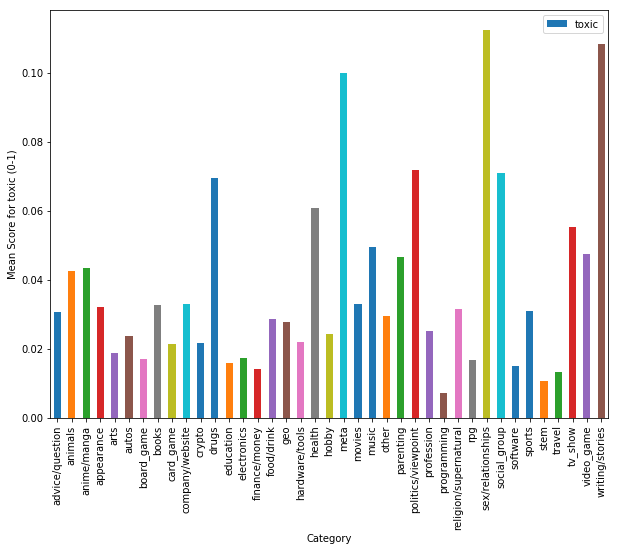

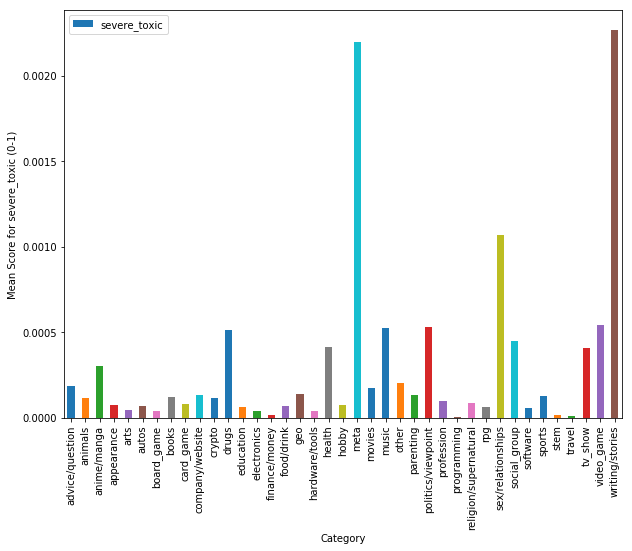

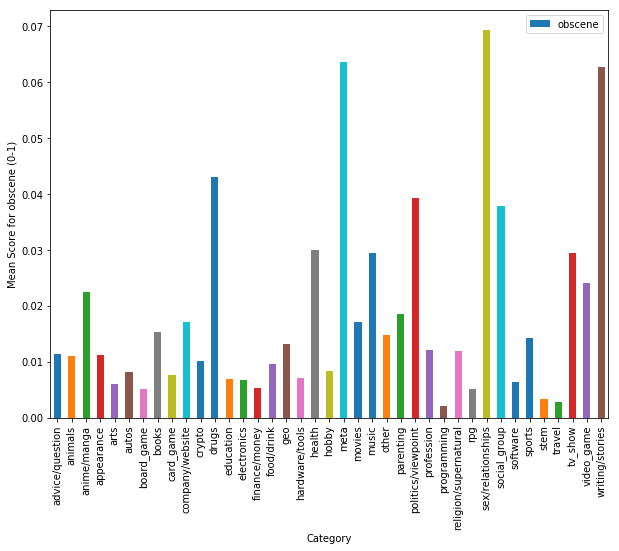

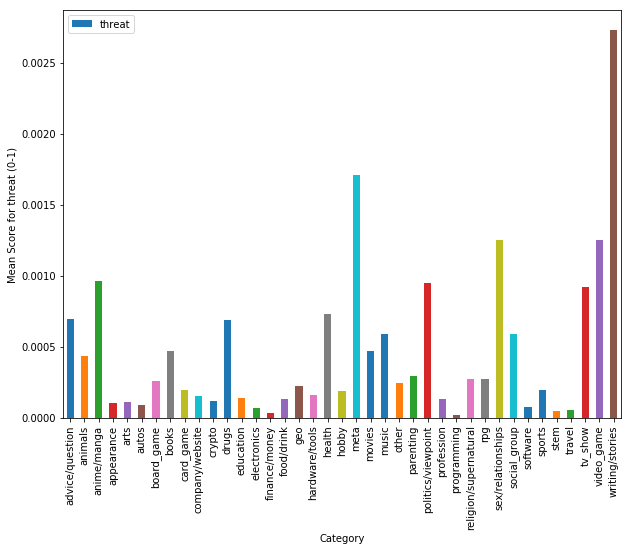

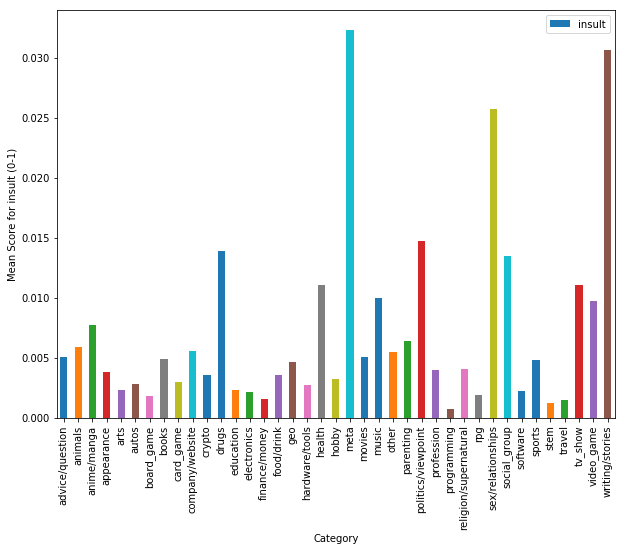

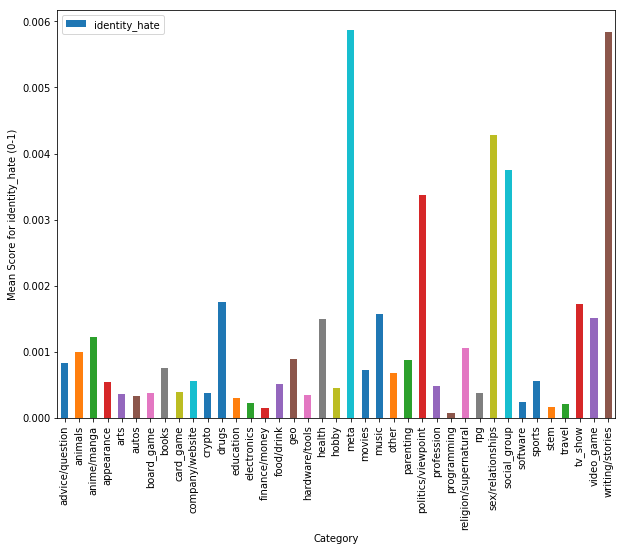

In [29]:
for colname in ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]:
    plottt = combined.groupby('category_1').mean().plot.bar(y=colname,figsize=(10,7.5))
    plottt.set_xlabel("Category")
    plottt.set_ylabel("Mean Score for "+colname+" (0-1)")
    plt.savefig(colname+"_category.png")

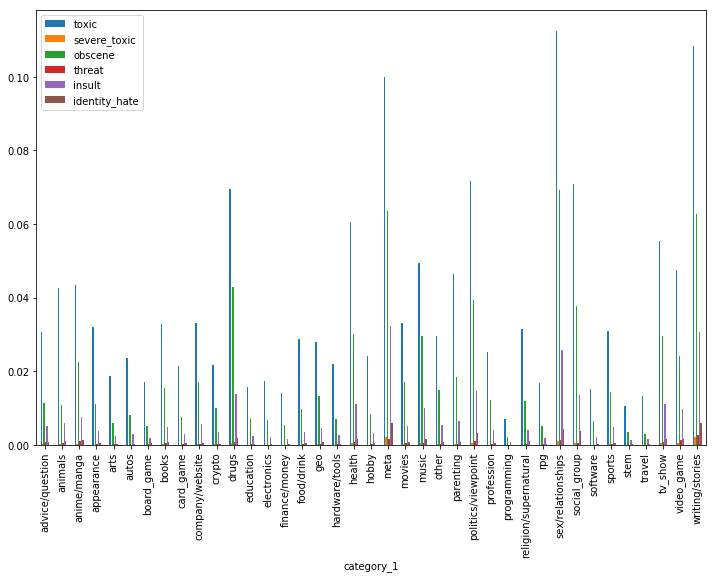

In [30]:
    combined.groupby('category_1').mean().plot.bar(figsize=(12,8))
    plottt.set_xlabel("Category")
    plottt.set_ylabel("Mean Score (0-1)")
    plt.savefig("combined_category.png")

In [31]:
import re
import operator
words = []
for phrase in comments.nlargest(12, 'identity_hate')['selftext'].tolist():
    words.append(re.sub("[^\w]", " ",  phrase).split())
words = [[word.lower() for word in phrase] for phrase in words]
words = [set(phrase) for phrase in words]

count={}
for phrase in words:
    for word in phrase:
        if word not in count:
            count[word] = sum([1 for line in words if word in line])
            
sorted(count.items(), key=operator.itemgetter(1), reverse=True)

# from collections import Counter
# counts = [Counter(phrase) for phrase in words]
# for count in counts:
#     print(sorted(count.items(), key=operator.itemgetter(1)))

[('nigga', 12),
 ('niggas', 11),
 ('the', 11),
 ('that', 10),
 ('been', 10),
 ('shit', 10),
 ('got', 10),
 ('and', 10),
 ('this', 10),
 ('ass', 10),
 ('i', 10),
 ('with', 10),
 ('my', 9),
 ('when', 9),
 ('be', 9),
 ('me', 9),
 ('fuck', 9),
 ('fuckin', 9),
 ('t', 9),
 ('know', 9),
 ('a', 9),
 ('in', 9),
 ('out', 9),
 ('they', 9),
 ('fucking', 9),
 ('up', 8),
 ('them', 8),
 ('m', 8),
 ('like', 8),
 ('since', 8),
 ('say', 8),
 ('another', 8),
 ('about', 8),
 ('there', 8),
 ('motherfucker', 8),
 ('stop', 8),
 ('playin', 8),
 ('work', 8),
 ('no', 8),
 ('if', 8),
 ('don', 8),
 ('more', 8),
 ('ya', 8),
 ('all', 8),
 ('you', 8),
 ('y', 8),
 ('live', 7),
 ('beating', 7),
 ('shut', 7),
 ('catch', 7),
 ('sweet', 7),
 ('him', 7),
 ('not', 7),
 ('ain', 7),
 ('playing', 7),
 ('talking', 7),
 ('telling', 7),
 ('savages', 7),
 ('talk', 7),
 ('motherfuckers', 7),
 ('bout', 7),
 ('fuckers', 7),
 ('putting', 7),
 ('he', 6),
 ('caught', 6),
 ('boy', 6),
 ('always', 6),
 ('those', 6),
 ('on', 6),
 ('at', 6

In [32]:
import re
import operator
words = []
for phrase in comments.nlargest(12, 'toxic')['selftext'].tolist():
    words.append(re.sub("[^\w]", " ",  phrase).split())
words = [[word.lower() for word in phrase] for phrase in words]
words = [set(phrase) for phrase in words]

count={}
for phrase in words:
    for word in phrase:
        if word not in count:
            count[word] = sum([1 for line in words if word in line])
            
sorted(count.items(), key=operator.itemgetter(1), reverse=True)

[('the', 11),
 ('i', 11),
 ('fucking', 11),
 ('a', 10),
 ('and', 9),
 ('fuck', 9),
 ('you', 8),
 ('in', 8),
 ('so', 7),
 ('my', 7),
 ('lb', 6),
 ('m', 6),
 ('like', 6),
 ('to', 6),
 ('ass', 6),
 ('this', 6),
 ('t', 5),
 ('that', 5),
 ('for', 5),
 ('your', 5),
 ('all', 5),
 ('shit', 5),
 ('get', 5),
 ('is', 5),
 ('it', 5),
 ('if', 5),
 ('with', 5),
 ('me', 5),
 ('bitch', 4),
 ('about', 4),
 ('no', 4),
 ('up', 4),
 ('can', 4),
 ('say', 4),
 ('been', 4),
 ('on', 4),
 ('of', 4),
 ('but', 4),
 ('was', 4),
 ('by', 4),
 ('know', 4),
 ('using', 4),
 ('should', 3),
 ('not', 3),
 ('shut', 3),
 ('s', 3),
 ('as', 3),
 ('don', 3),
 ('one', 3),
 ('wait', 3),
 ('game', 3),
 ('what', 3),
 ('niggas', 3),
 ('real', 3),
 ('nigga', 3),
 ('have', 3),
 ('use', 3),
 ('do', 3),
 ('faggot', 3),
 ('even', 3),
 ('be', 3),
 ('two', 3),
 ('are', 3),
 ('cock', 3),
 ('when', 3),
 ('just', 3),
 ('work', 3),
 ('asshole', 3),
 ('has', 3),
 ('over', 3),
 ('bullshit', 3),
 ('because', 2),
 ('normal', 2),
 ('faggots', 2),

In [33]:
import re
import operator
words = []
for phrase in comments.nlargest(12, 'severe_toxic')['selftext'].tolist():
    words.append(re.sub("[^\w]", " ",  phrase).split())
words = [[word.lower() for word in phrase] for phrase in words]
words = [set(phrase) for phrase in words]

count={}
for phrase in words:
    for word in phrase:
        if word not in count:
            count[word] = sum([1 for line in words if word in line])
            
sorted(count.items(), key=operator.itemgetter(1), reverse=True)

[('i', 12),
 ('the', 12),
 ('and', 10),
 ('lb', 9),
 ('you', 9),
 ('fucking', 9),
 ('my', 9),
 ('a', 8),
 ('to', 7),
 ('me', 7),
 ('in', 7),
 ('fuck', 7),
 ('this', 6),
 ('get', 6),
 ('on', 6),
 ('with', 6),
 ('t', 5),
 ('are', 5),
 ('when', 5),
 ('all', 5),
 ('that', 5),
 ('ass', 5),
 ('it', 5),
 ('s', 4),
 ('they', 4),
 ('just', 4),
 ('is', 4),
 ('at', 4),
 ('your', 4),
 ('cock', 4),
 ('of', 4),
 ('fuckin', 4),
 ('up', 4),
 ('as', 4),
 ('ve', 3),
 ('hate', 3),
 ('know', 3),
 ('don', 3),
 ('but', 3),
 ('asshole', 3),
 ('love', 3),
 ('day', 3),
 ('can', 3),
 ('no', 3),
 ('so', 3),
 ('for', 3),
 ('those', 3),
 ('better', 3),
 ('bitch', 3),
 ('say', 3),
 ('dick', 3),
 ('niggas', 3),
 ('y', 3),
 ('or', 3),
 ('them', 2),
 ('like', 2),
 ('done', 2),
 ('job', 2),
 ('kill', 2),
 ('mother', 2),
 ('man', 2),
 ('have', 2),
 ('motherfuckers', 2),
 ('these', 2),
 ('also', 2),
 ('boy', 2),
 ('women', 2),
 ('faggot', 2),
 ('fag', 2),
 ('be', 2),
 ('again', 2),
 ('has', 2),
 ('using', 2),
 ('than', 2

In [34]:
import re
import operator
words = []
for phrase in comments.nlargest(12, 'insult')['selftext'].tolist():
    words.append(re.sub("[^\w]", " ",  phrase).split())
words = [[word.lower() for word in phrase] for phrase in words]
words = [set(phrase) for phrase in words]

count={}
for phrase in words:
    for word in phrase:
        if word not in count:
            count[word] = sum([1 for line in words if word in line])
            
sorted(count.items(), key=operator.itemgetter(1), reverse=True)

[('i', 12),
 ('a', 11),
 ('you', 10),
 ('the', 10),
 ('fuck', 10),
 ('and', 9),
 ('lb', 8),
 ('fucking', 8),
 ('to', 8),
 ('t', 7),
 ('that', 7),
 ('so', 7),
 ('in', 7),
 ('my', 7),
 ('ass', 7),
 ('not', 6),
 ('up', 6),
 ('your', 6),
 ('all', 6),
 ('of', 6),
 ('this', 6),
 ('with', 6),
 ('it', 6),
 ('for', 5),
 ('can', 5),
 ('as', 5),
 ('m', 5),
 ('get', 5),
 ('is', 5),
 ('on', 5),
 ('but', 5),
 ('if', 5),
 ('because', 4),
 ('bitch', 4),
 ('about', 4),
 ('no', 4),
 ('s', 4),
 ('don', 4),
 ('re', 4),
 ('shit', 4),
 ('have', 4),
 ('use', 4),
 ('like', 4),
 ('do', 4),
 ('faggot', 4),
 ('some', 4),
 ('there', 4),
 ('are', 4),
 ('out', 4),
 ('from', 4),
 ('going', 3),
 ('idiot', 3),
 ('off', 3),
 ('making', 3),
 ('shut', 3),
 ('take', 3),
 ('gay', 3),
 ('wait', 3),
 ('say', 3),
 ('niggas', 3),
 ('real', 3),
 ('been', 3),
 ('nigga', 3),
 ('still', 3),
 ('who', 3),
 ('never', 3),
 ('more', 3),
 ('even', 3),
 ('stupid', 3),
 ('or', 3),
 ('need', 3),
 ('work', 3),
 ('dick', 3),
 ('asshole', 3),

In [35]:
import re
import operator
words = []
for phrase in comments.nlargest(12, 'obscene')['selftext'].tolist():
    words.append(re.sub("[^\w]", " ",  phrase).split())
words = [[word.lower() for word in phrase] for phrase in words]
words = [set(phrase) for phrase in words]

count={}
for phrase in words:
    for word in phrase:
        if word not in count:
            count[word] = sum([1 for line in words if word in line])
            
sorted(count.items(), key=operator.itemgetter(1), reverse=True)

[('fucking', 11),
 ('the', 10),
 ('i', 10),
 ('a', 9),
 ('fuck', 8),
 ('in', 8),
 ('and', 8),
 ('so', 8),
 ('you', 7),
 ('to', 6),
 ('lb', 6),
 ('my', 6),
 ('this', 6),
 ('get', 6),
 ('like', 5),
 ('is', 5),
 ('it', 5),
 ('ass', 5),
 ('if', 5),
 ('m', 5),
 ('your', 5),
 ('was', 4),
 ('bitch', 4),
 ('say', 4),
 ('me', 4),
 ('shit', 4),
 ('using', 4),
 ('but', 4),
 ('t', 4),
 ('that', 4),
 ('for', 4),
 ('can', 4),
 ('on', 4),
 ('of', 4),
 ('all', 4),
 ('with', 4),
 ('should', 3),
 ('by', 3),
 ('two', 3),
 ('one', 3),
 ('use', 3),
 ('up', 3),
 ('are', 3),
 ('know', 3),
 ('cock', 3),
 ('as', 3),
 ('just', 3),
 ('thats', 3),
 ('self', 3),
 ('what', 3),
 ('do', 3),
 ('about', 3),
 ('asshole', 3),
 ('has', 3),
 ('no', 3),
 ('over', 3),
 ('wait', 3),
 ('real', 3),
 ('have', 3),
 ('even', 3),
 ('s', 3),
 ('game', 3),
 ('been', 3),
 ('faggot', 3),
 ('bullshit', 3),
 ('be', 2),
 ('an', 2),
 ('ok', 2),
 ('women', 2),
 ('when', 2),
 ('they', 2),
 ('dick', 2),
 ('love', 2),
 ('im', 2),
 ('chorus', 2

In [36]:
import re
import operator
words = []
for phrase in comments.nlargest(12, 'threat')['selftext'].tolist():
    words.append(re.sub("[^\w]", " ",  phrase).split())
words = [[word.lower() for word in phrase] for phrase in words]
words = [set(phrase) for phrase in words]

count={}
for phrase in words:
    for word in phrase:
        if word not in count:
            count[word] = sum([1 for line in words if word in line])
            
sorted(count.items(), key=operator.itemgetter(1), reverse=True)

[('kill', 12),
 ('of', 10),
 ('the', 10),
 ('i', 9),
 ('lb', 9),
 ('that', 9),
 ('to', 9),
 ('you', 9),
 ('and', 9),
 ('is', 8),
 ('a', 7),
 ('in', 7),
 ('this', 6),
 ('with', 6),
 ('s', 6),
 ('for', 6),
 ('it', 5),
 ('have', 5),
 ('all', 5),
 ('your', 5),
 ('if', 5),
 ('so', 5),
 ('like', 5),
 ('fucking', 5),
 ('t', 4),
 ('me', 4),
 ('get', 4),
 ('can', 4),
 ('my', 4),
 ('will', 4),
 ('want', 4),
 ('are', 3),
 ('when', 3),
 ('we', 3),
 ('then', 3),
 ('ve', 3),
 ('fuck', 3),
 ('up', 3),
 ('how', 3),
 ('more', 3),
 ('some', 3),
 ('go', 3),
 ('sick', 3),
 ('on', 3),
 ('make', 3),
 ('no', 3),
 ('out', 3),
 ('who', 3),
 ('hate', 3),
 ('they', 3),
 ('people', 3),
 ('re', 3),
 ('come', 2),
 ('here', 2),
 ('these', 2),
 ('good', 2),
 ('he', 2),
 ('even', 2),
 ('just', 2),
 ('1', 2),
 ('beat', 2),
 ('think', 2),
 ('from', 2),
 ('live', 2),
 ('something', 2),
 ('one', 2),
 ('such', 2),
 ('done', 2),
 ('say', 2),
 ('retard', 2),
 ('shit', 2),
 ('see', 2),
 ('by', 2),
 ('do', 2),
 ('life', 2),
 (

In [49]:
comments.nlargest(12, 'identity_hate')['selftext'].tolist()

['Listen my niggas. We have been had my niggas. Im sick of being told that my niggas aint as good as other real niggas im offically DONE my niggas we need to fight my niggas NIGA NIGGA NIGERIA NIGGER NIGGGGER NIGGGGGGGGER NNNNNNNNNNNNNNNNNNIIIIIIIIIIIIIIIIIIIIIIIGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEEEEEEEERRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR NAGGER NACHOS NICKELODEN NIGGERS!',
 '"Humzinger pushed the ball once and for-- OH SYKE  <lb>Gawsh, bygone, bye, gone.  <lb>He some mini Jeb Bush nigga who poison rat  <lb>By gawsh, bygone, bye, gone... OH SHIT!  <lb>Humzinger, he break the heart when he hit  <lb>OH SYKE, got who, Derrick? got WHO, DERRICK?? GOT WHO???  <lb>He some Mighty jeb Boosh; nigga, who poison rap?"',
 'Fuckers in the tavern telling me, always in the blacksmith, Geralt ain’t bout this, Geralt ain’t bout that. My boy a Dandelion and fucking Yennefer and them. He, he they say that nigga don’t be putting in no work. SHUT THE FUCK UP! Y’all niggas ain’t know s

In [44]:
import json

with open('combined_data.json', 'w') as f:
    json.dump(combined.T.to_dict(orient='list'), f)

In [55]:
list(combined.groupby('category_1').mean()

['talesfromtechsupport',
 'teenmom',
 'Harley',
 'ringdoorbell',
 'intel',
 'residentevil',
 'BATProject',
 'hockeyplayers',
 'asmr',
 'rawdenim',
 'steinsgate',
 'DBZDokkanBattle',
 'Nootropics',
 'l5r',
 'NameThatSong',
 'homeless',
 'antidepressants',
 'absolver',
 'KissAnime',
 'sissyhypno',
 'oculusnsfw',
 'dpdr',
 'Garmin',
 'dpdr',
 'AskLiteraryStudies',
 'poetry_critics',
 'skiing',
 'shrimptank',
 'logorequests',
 'Stargate',
 'foreskin_restoration',
 'sharepoint',
 'synthesizers',
 'gravityfalls',
 'androiddev',
 'Grimdawn',
 'driving',
 'FORTnITE',
 'dndnext',
 'Magic',
 'MtvChallenge',
 'FoWtcg',
 'harrypotter',
 'TryingForABaby',
 'sewing',
 'foxholegame',
 'madmen',
 'JUSTNOMIL',
 'APStudents',
 'sharditkeepit',
 'amateurradio',
 'sleeptrain',
 'fatpeoplestories',
 'GameStop',
 'scuba',
 'Firefighting',
 'Mustang',
 'riverdale',
 'flying',
 'bartenders',
 'scooters',
 'trumpet',
 'projecteternity',
 'musictheory',
 'factorio',
 'SexToys',
 'EternalCardGame',
 'PLC',
 'sai

In [48]:
combined.groupby('category_1').mean().to_json('combined_means.json')

In [3]:
pd


NameError: name 'pd' is not defined

In [ ]:
from IPython.display import display
query = input("Input the label or subreddit to analyze ")
if query in ["identity_hate", "toxic", "severe_toxic", "obscene", "threat", "insult"]:
    print("reached")
    display(comments.nlargest(12, query))
    display(comments.groupby('subreddit').mean().nlargest(12, query))
elif query in list(comments['subreddit']):
    df = comments.loc[comments['subreddit'] == query]
    display(df.mean())
    display(df)